# High Resolution Violin Transcription using Weak Labels

A descriptive transcription of a violin performance requires detecting not only the notes but also the fine-grained pitch variations, such as vibrato. Most existing deep learning methods for music transcription do not capture these variations and often need frame-level annotations, which are scarce for the violin. In this paper, we propose a novel method for high-resolution violin transcription that can leverage piece-level weak labels for training. Our conformer-based model works on the raw audio waveform and transcribes violin notes and their corresponding pitch deviations with 5.8 ms frame resolution and 10-cent frequency resolution. We demonstrate that our method (1) outperforms generic systems in the proxy tasks of violin transcription and pitch estimation, and (2) can automatically generate new training labels by aligning its feature representations with unseen scores. We share our model along with 34 hours of score-aligned solo violin performance dataset, notably including the 24 Paganini Caprices.

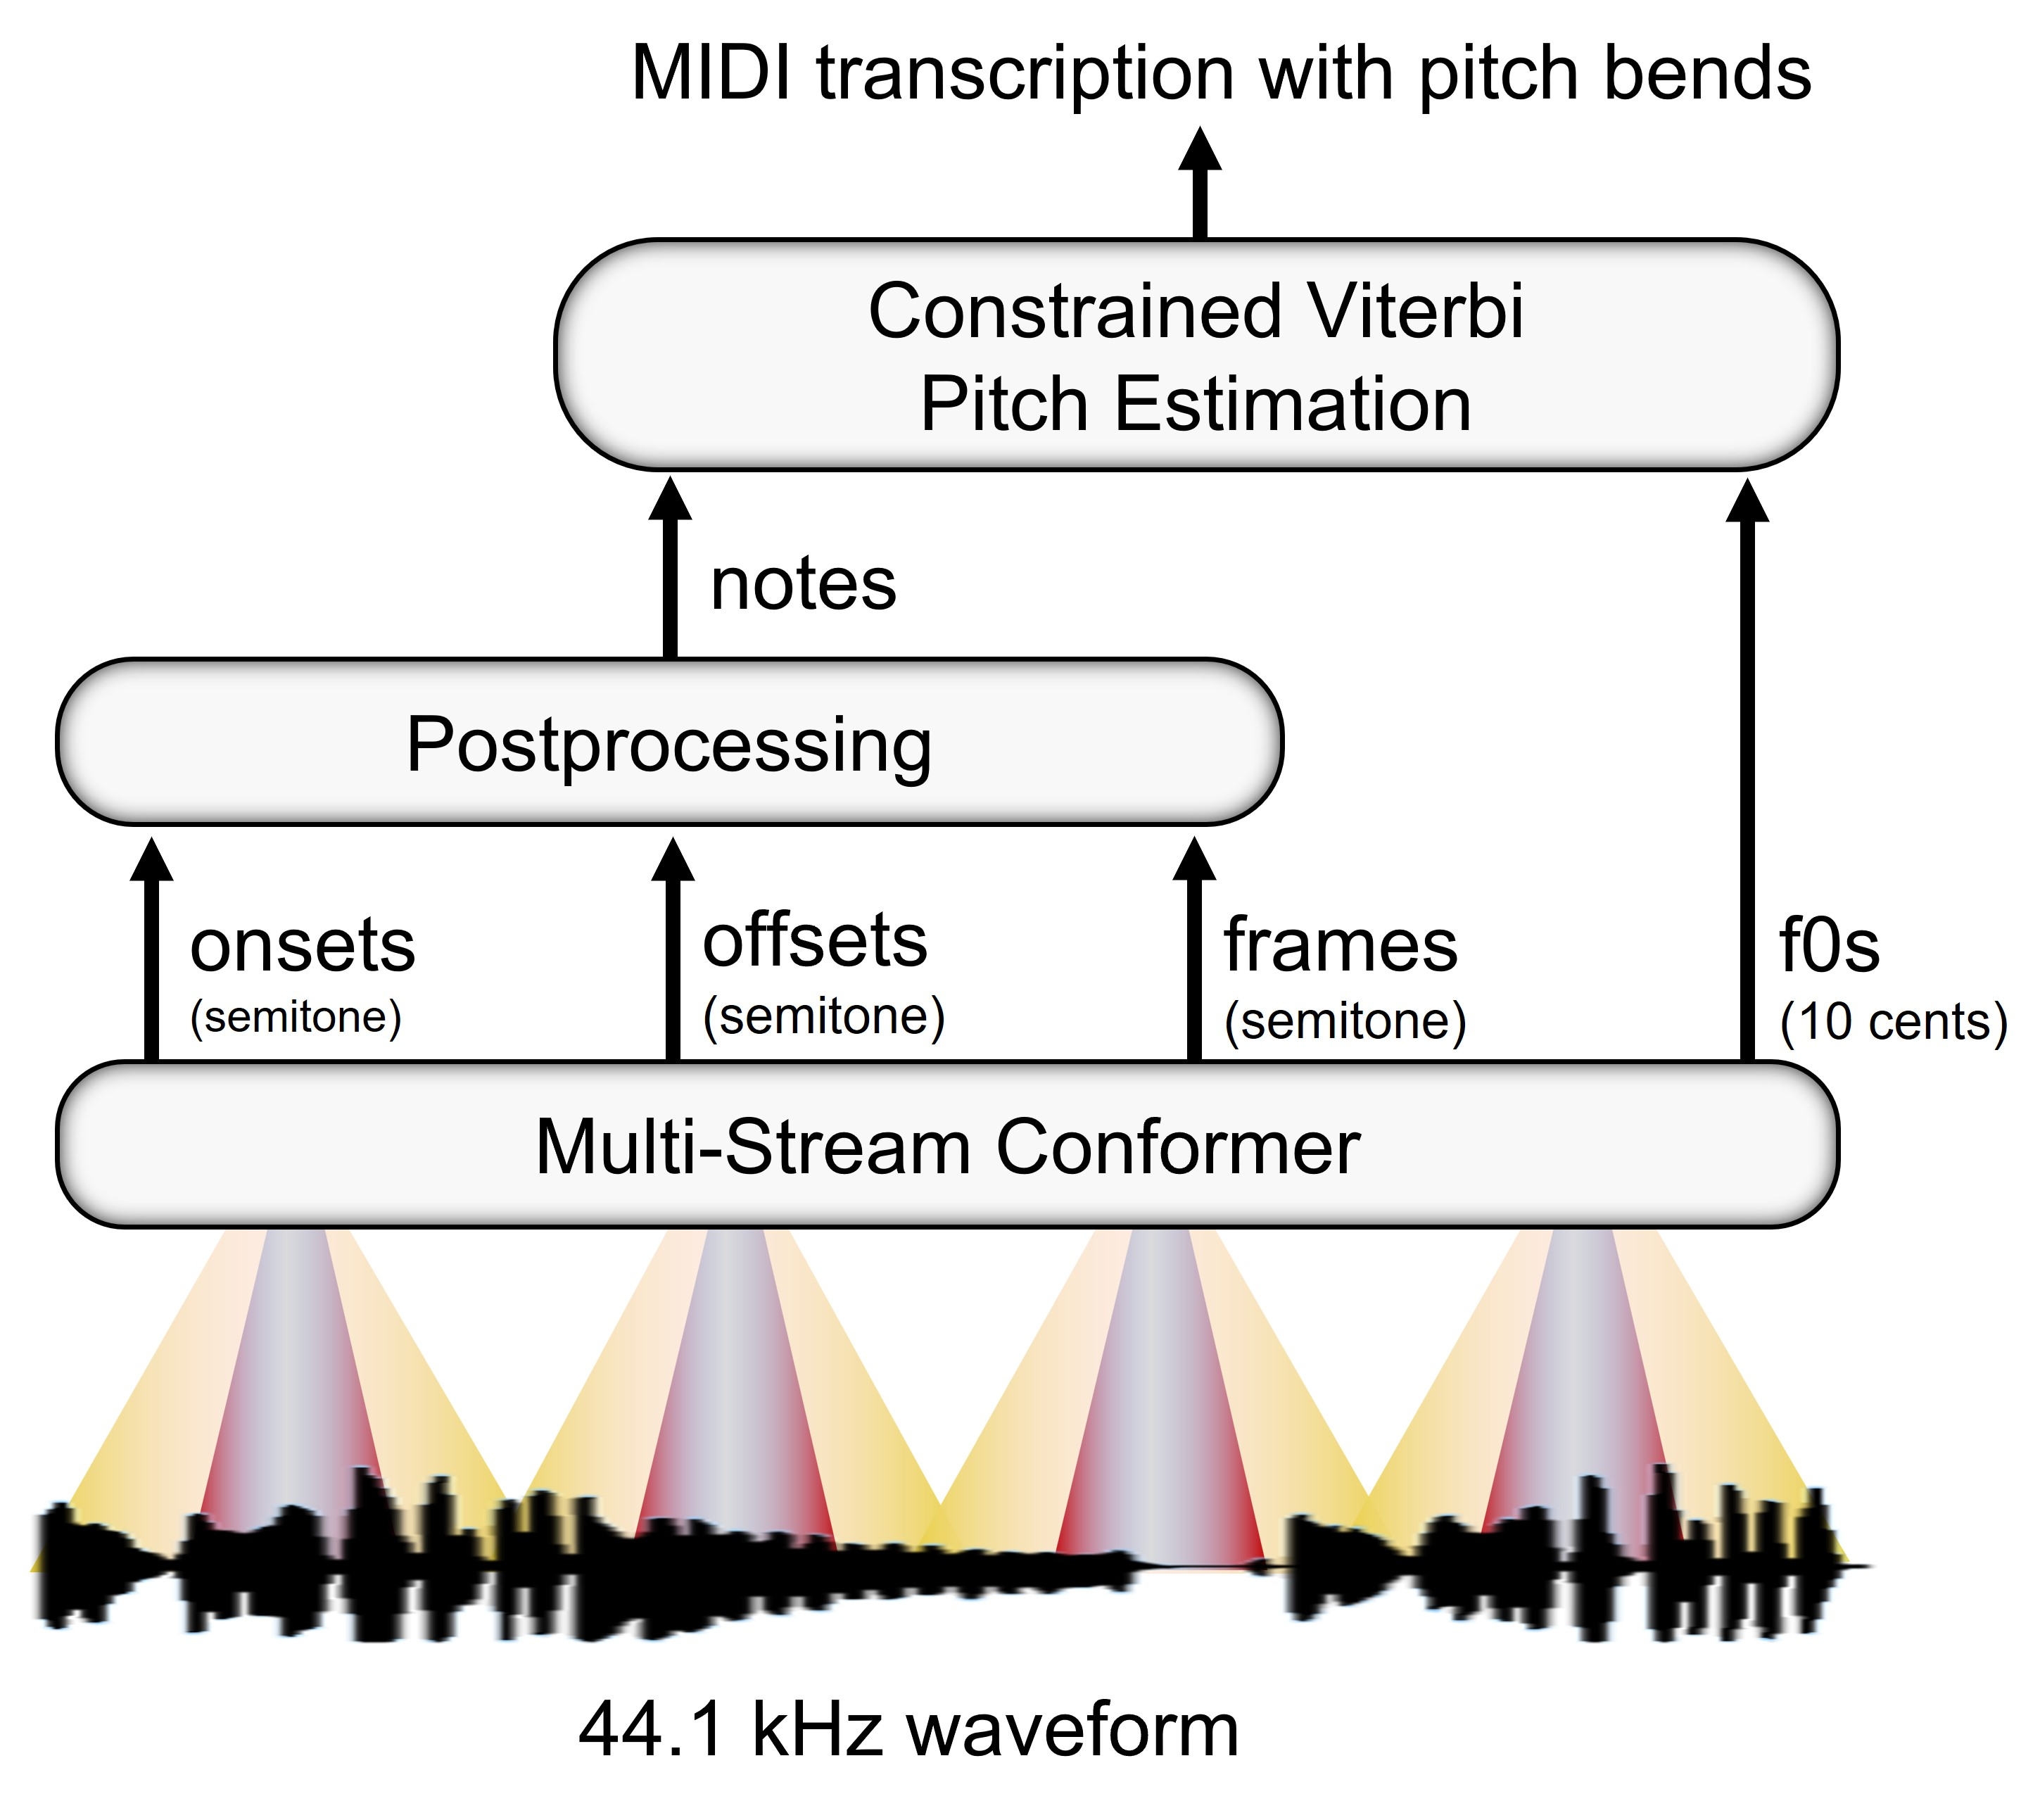

In [7]:
#@markdown #Please run this cell to install dependencies.

#@markdown In this demo notebook you can generate MIDI transcription with pitch bends from violin recordings on YouTube.



!rm -rf MUSC_violin # remove if the directory already exists
!git clone https://github.com/MTG/violin-transcription.git MUSC_violin &> /dev/null
import os
import sys
!pip install yt-dlp &> /dev/null
!pip install mir_eval &> /dev/null
!pip install pretty_midi &> /dev/null
!pip install unidecode &> /dev/null
from unidecode import unidecode
#!pip install yt-dlp &> /dev/null
import torch
import json
#from yt_dlp import YoutubeDL
sys.path.append('MUSC_violin')
from MUSC_violin import musc


In [10]:
from musc.model import PretrainedModel

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = PretrainedModel(instrument='violin').to(device)

hop in samples: 256
main stream window: 131964 , attendant stream window: 136015 , conformer input dim: 256
main frame overlap: [574, 574] , attendant frame overlap: [2599, 2600]
crop for main pathway [2025, -2026]
Total sequence duration is 136015 samples
Main stream receptive field for one frame is 1148 samples
Attendant stream receptive field for one frame is 5199 samples
Total parameter count:  54580722


Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1FfUjC3usmZBoTxNT6rNVIcYw4pol4K1g
To: /content/MUSC_violin/musc/violin_model.pt
100%|██████████| 219M/219M [00:02<00:00, 92.2MB/s]


An example outside the train set

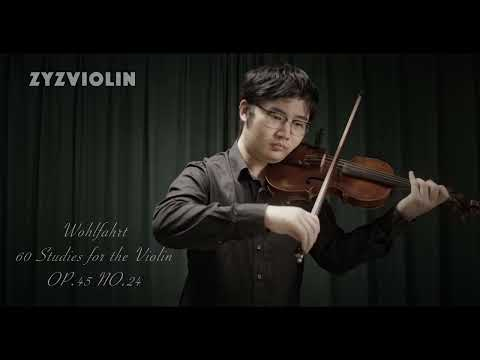

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import display, Audio, YouTubeVideo
from google.colab import files

for url in ['https://www.youtube.com/watch?v=ul6mJbNEA9A']:

    midi, id, title = model.transcribe_youtube(url, audio_codec='wav',
                                                batch_size=32,
                                                postprocessing='spotify')
    display(YouTubeVideo(id))

    midi.write(unidecode(title)+'.mid')
    files.download(unidecode(title)+'.mid') # important! your browser might block
    # downloading multiple files automatically! please look at your urlbar!!

## MUSC performance in other music traditions (still experimental)

Violin is the backbone of traditions like Turkish, Greek, Arabic, or Carnatic music, where intervals outside the conventional Western 12-tone equal temperament are used.

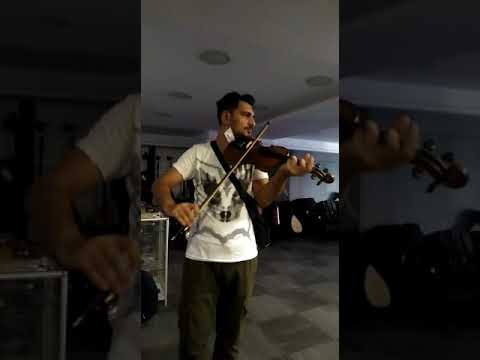

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
from IPython.display import display, Audio, YouTubeVideo
from google.colab import files

for url in ['https://www.youtube.com/watch?v=Y_rHaPwxhjI']:

    midi, id, title = model.transcribe_youtube(url, audio_codec='wav',
                                                batch_size=32,
                                                postprocessing='spotify')
    display(YouTubeVideo(id))
    midi.write(unidecode(title)+'.mid')
    files.download(unidecode(title)+'.mid') # important! your browser might block
    # downloading multiple files automatically! please look at your urlbar!!

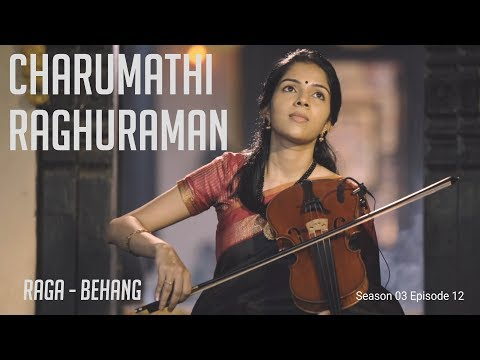

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
from IPython.display import display, Audio, YouTubeVideo
from google.colab import files

for url in ['https://www.youtube.com/watch?v=ESEJ1BdOVnM']:

    midi, id, title = model.transcribe_youtube(url, audio_codec='wav',
                                                batch_size=32,
                                                postprocessing='spotify')
    display(YouTubeVideo(id))
    midi.write(unidecode(title)+'.mid')
    files.download(unidecode(title)+'.mid') # important! your browser might block
    # downloading multiple files automatically! please look at your urlbar!!


# Reading the dataset

In [19]:
import glob
dataset = glob.glob('MUSC_violin/dataset/*/*.mid*')

Paganini Op01-12


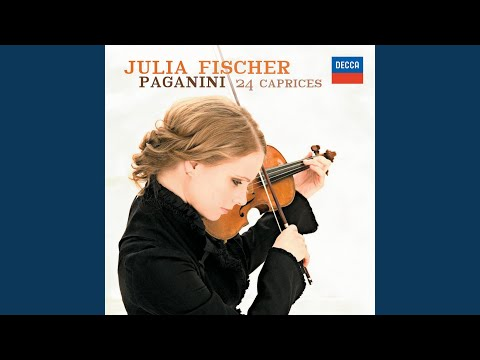

In [31]:
item = dataset[0]
composer, op, player, id = item.rsplit('/')[-1].split('_', 3)
id = id.rsplit('.mid',2)[0]
id, start, end = id.rsplit('-', 2)
start = int(start)
end = int(end)
print(composer, op)
display(YouTubeVideo(id, start=start, end=end))